## Exercise: Linear Regression

----

Burton Rosenberg

University of Miami

copyright 2023 burton rosenberg all rights reserved


----


### Table of contents.

1. <a href="#introduction">Introduction</a>
1. <a href="#pearsonr">Pearson's R</a>
1. <a href="#exercise">Exercise: MyLinReg</a>

### <a name ="introduction">Introduction</a>

The numpy package can do very sophisticated linear regressions, including returning many values to quantify the quality of the linear regression fit. See, for instance,

- [Numpy Linear Algebra Reference](https://numpy.org/doc/stable/reference/routines.linalg.html)
- [Numpy Statistics Reference](https://numpy.org/doc/stable/reference/routines.statistics.html).

However, as a matter of practicing numpy and our knowledge of statistics, this 
exericse will build linear regression from the most basic numpy tools.

Suppose we have a set of pairs $(x_i,y_i)$ which we belief are in a mathematical relationship. We decide to model the relationship as basically linear. That
is we believe there is an $m$ and and $b$ such that,

$$
y_i = m x_i + b + e_i
$$

for all $i$, where the hopefully small values $e_i$ accommodate that in any of 
several ways, the relationship is not exact. We now have an optimization problem of choosing $m$ and $b$ such that the $e_i$ are minimized.

### <a name="pearsonr">Pearson's R</a>

Supposing the $x$ and $y$ were random variables, and the idea is to predict one from the other. 

Let $\bar{x} = E(x)$ the expectation of $x$, intuitively the no-observation guess of the value of a trial, and $\bar{y}= E(y)$ but the same for $y$, then already we have something like, 

$$
E(y) = E(m\,x+b) = m\,E(x) + b,
$$

so

$$
b = \hat{y}- m\,\hat{x}.
$$

If we now consider the residual uncertainty of $y-mx-b$, if we wish this uncertainty have the property that it adds when $x$ and $y$ are independent, we would look to minimize the variance of that value by choice of $m$. By shifting the $x$ and $y$ if needed, we assume zero mean, and do the calculus,

$$
d/dm \;(y - m x)^2 = 2 (y - m x) (-x) = 0
$$

or

$$
x\cdot y = m\, x\cdot x
$$ 

Pearson introduced version of this formula for $m$ based on his R,

$$
R(x,y)= {x\cdot y \over {\sqrt{y\cdot y}\sqrt{x\cdot x}}} 
$$

and then the final formula for $m$,

$$
 m = {\sqrt{y\cdot y}\over \sqrt{x \cdot x}}\; R (x,y).
$$

The reason why Pearson introduced $R$ is it gives this interpretation. 

#####  When Pearson's R is zero. 

If $R$ is zero, nothing of $x$ is used to update our prediction of $y$. The factors $y$ and $x$ are independent as random variables.

##### When Pearson's R is 1.

If $R$ is 1 it means the entire variance of $y$ is explained by $x$. The error terms are driven to zero, and the variables are perfectly correlated. Everything about $y$ is explained by $x$. 

##### Other values of Pearson's R

If $R$ is $-1$, the entire variance of $y$ is explained by $x$, but the factors co-vary. All other values of $R$ lie between 1 and -1, and indicate the fraction of variance that $x$ explains for $y$. The remaining variance might be due to some other factor, or might be error or noise.





### <a name="exercise">Exercise: MyLinReg</a>

Implement the class MyLinReg to do calculate using basic numpy operations the various statistical quantities, and the linear regression parameters.

Implement a function returning the mean if a vector, the covariance of two vectors,
the variance of a vector and the standard deviation of a vector.

Compute the Pearson R, and finally the parameters, 
$$
   m =  \frac{\mbox{SD}(y) \;\mbox{R}(x,y)}{ \mbox{SD}(x)}
$$

and the intercept by taking the mean,

$$
b = E(y) - m \,E(x)
$$



In [2]:
import numpy as np

class MyLinReg:
    
    def __init__(self,x,y):
        assert len(x)==len(y)
        self.x = x
        self.y = y

    def mean(self,z):
        # the mean of z
        
        return np.mean(z)

    def covar(self,z1,z2):
        # the covariance of z1 and z2
        
        return np.cov(z1, z2)

    def var(self, z):
        # the variance of z
        
        return np.var(z)

    def stddev(self,z):
        # the standard deviation of z
        
        return np.std(z)

    def pearson(self):
        # the Pearson R between the two ndarrays given in the constructor

        return np.corrcoef(self.x,self.y)[0][1]

    def linear_regression(self):
        # do the linear regression between the two ndarrays given
        # return a tuple (slope, intercept,R) 

        m = 0.0
        b = 0.0
        r = 0.0
        
        mean_x = self.mean(self.x)
        mean_y = self.mean(self.y)
        std_x = self.stddev(self.x)
        std_y = self.stddev(self.y)
        pearsonVal = self.pearson()
        
        m = std_y * pearsonVal/std_x
        b = mean_y - (m*mean_x)
        r = pearsonVal
        
        return(m,b,r)



### Test: Chocolate consumption

Test on the example from the  Coursera Basic Statistic course, University of Amsterdam,
and it was an example of something versus chocolate comsumption. 

<pre>
mean x = 162.5
std x = 110.8678
mean y = 71.25
std x = 18.42779
pearson = 0.9279
m = 0.1542
b = 46.1864
</pre>




In [3]:
## this is from the Coursera Basic Statistic course, University of Amsterdam

x = np.array([50,100,200,300],dtype=np.float64)
y = np.array([50,70,70,95],dtype=np.float64)

mlr = MyLinReg(x,y)
res = mlr.linear_regression()
print(f'm = {res[0]:.4f}, b = {res[1]:.4f}, R = {res[2]:.4f}')

best_fit = lambda x: res[0]*x + res[1]

# answer is m = 0.1542, b = 46.1864, R = 0.9279

m = 0.1542, b = 46.1864, R = 0.9279


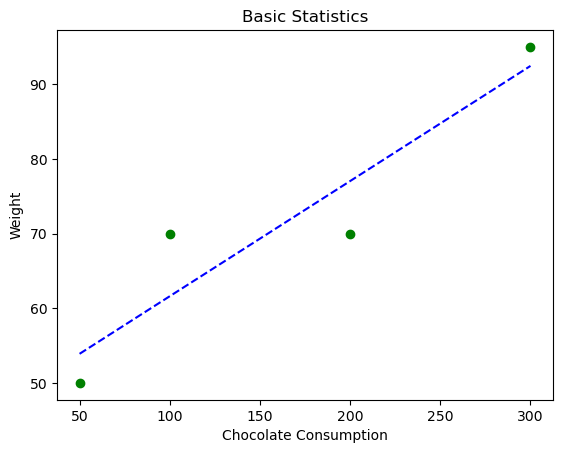

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x,y,c='g')
plt.plot(x,best_fit(x),'b--',)
plt.xlabel("Chocolate Consumption")
plt.ylabel("Weight")
plt.title("Basic Statistics")
plt.show()


### Random testing


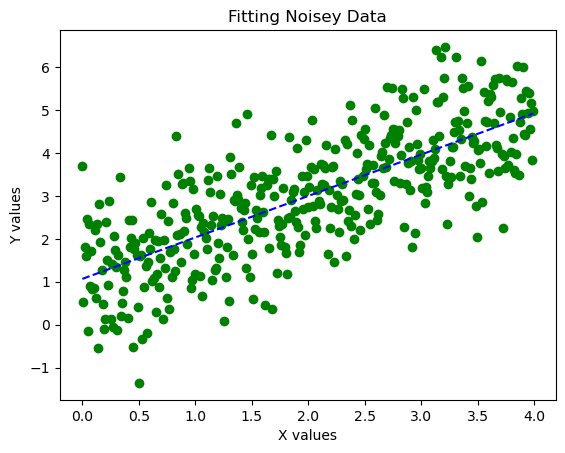

In [5]:
def prepare_the_noisy(n,m,b,r):
    x = np.arange(0,4,1.0/n)
    y = m*x + b + r*np.random.randn(len(x))
    return (x,y)

(x,y) = prepare_the_noisy(100,1,1,1)

mlg = MyLinReg(x,y)
res = mlg.linear_regression()
f = lambda x: res[0]*x + res[1]

plt.scatter(x,y,c='g')
plt.plot(x,f(x),'b--',)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Fitting Noisey Data")
plt.show()


### END